In [1]:
%load_ext autoreload
%autoreload 2

# Antibody

![](figures/antibody.jpg)

Antibodies are Y‑shaped proteins produced by B cells of the adaptive immune system. 
Each antibody consists of two identical *heavy chains* and *light chains*, joined by disulfide bonds into a flexible structure with:

* **Constant (Fc) region:** mediates effector functions such as recruiting immune cells and triggering complement.
* **Variable (Fab) regions:** at the two “arms” of the Y, each containing a unique antigen‑binding site.

Through somatic recombination and hypermutation, our bodies can generate an enormous repertoire of antibodies. 
Estimates are up to 10^18. (Briney et al. Nature, 2019)


### Protein Design Perspective
* Antibodies are natural binders. Binder design is one of the first areas where protein design has seen success.
* Therapeutically relevant: -mabs in cancer therapy. New modalities including bi-specific Ab, Ab-drug conjugates.
* Modular: Binding is believed to be mediated by variable region. Fc region can be separately engineered for selective immune activation etc.
* Somewhat tractable: variable region is only 200-300 amino acids. 


### For today, we will focus on a single Vh - Vl region


# Data

### Observed antibody space
[OAS](https://opig.stats.ox.ac.uk/webapps/oas/) is a community-submitted resource of known antibody sequences in multiple species, disease, immunization contexts. Maintained by Charlotte Dean's Lab at Oxford

Curated unpaired and paired antibody sequences. Paired sequencing are mostly generated on the [10x Chromium](https://www.10xgenomics.com/blog/immune-repertoire-profiling-at-single-cell-resolution) platform. 3M pairs from 19 studies as of Jul 2025.

In [1]:
from MDLM.data import OASDataModule
from pathlib import Path

In [2]:
oas_data = OASDataModule()
data_dir = "data/oas_pair_human"
oas_data.load_data_folder(data_dir)

 21%|████████████████████████████▌                                                                                                             | 58/280 [00:41<03:47,  1.03s/it]/data1/tanseyw/projects/feiyang/diffusion_RG/mdlm_antibody/src/MDLM/data/data.py:145: DtypeWarning: Columns (109,125,126,127,128,155,191) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, header=1)
 25%|██████████████████████████████████▌                                                                                                       | 70/280 [00:46<01:29,  2.34it/s]/data1/tanseyw/projects/feiyang/diffusion_RG/mdlm_antibody/src/MDLM/data/data.py:145: DtypeWarning: Columns (109,125,126,127,128,155,191) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, header=1)
 49%|██████████████████████████████████████████████████████████████████▌                                                                      | 13

In [3]:
oas_data.df.head()

,sequence_id_heavy,sequence_heavy,locus_heavy,stop_codon_heavy,vj_in_frame_heavy,v_frameshift_heavy,productive_heavy,rev_comp_heavy,complete_vdj_heavy,v_call_heavy,...,Age,BSource,BType,Vaccine,Disease,Subject,Longitudinal,Unique sequences,Isotype,Chain
0,AAACCTGAGAGGGATA-1_contig_1,ACTTTCTGAGAGTCCTGGACCTCCTGTGCAAGAACATGAAACATCT...,H,F,T,F,T,F,T,IGHV4-61*02,...,38,PBMC,Naive-B-Cells,None,None,Donor-3,no,18894,All,Paired
1,AAACCTGAGCTGTTCA-1_contig_1,GGGAGCATCACCCAGCAACCACATCTGTCCTCTAGAGAATCCCCTG...,H,F,T,F,T,F,T,IGHV1-2*02,...,38,PBMC,Naive-B-Cells,None,None,Donor-3,no,18894,All,Paired
2,AAACCTGAGGAATTAC-1_contig_2,AGCTCTGAGAGAGGAGCCCAGCCCTGGGATTTTCAGGTGTTTTCAT...,H,F,T,F,T,F,T,IGHV3-23*01,...,38,PBMC,Naive-B-Cells,None,None,Donor-3,no,18894,All,Paired
3,AAACCTGAGGACAGCT-1_contig_2,AGCTCTGAGAGAGGAGCCTTAGCCCTGGATTCCAAGGCCTATCCAC...,H,F,T,F,T,F,T,IGHV3-21*01,...,38,PBMC,Naive-B-Cells,None,None,Donor-3,no,18894,All,Paired
4,AAACCTGAGTATTGGA-1_contig_1,AGCTCTCAGAGAGGTGCCTTAGCCCTGGATTCCAAGGCATTTCCAC...,H,F,T,F,T,F,T,IGHV3-48*01,...,38,PBMC,Naive-B-Cells,None,None,Donor-3,no,18894,All,Paired


In [4]:
oas_data.df.columns.to_list()

['sequence_id_heavy',
 'sequence_heavy',
 'locus_heavy',
 'stop_codon_heavy',
 'vj_in_frame_heavy',
 'v_frameshift_heavy',
 'productive_heavy',
 'rev_comp_heavy',
 'complete_vdj_heavy',
 'v_call_heavy',
 'd_call_heavy',
 'j_call_heavy',
 'sequence_alignment_heavy',
 'germline_alignment_heavy',
 'sequence_alignment_aa_heavy',
 'germline_alignment_aa_heavy',
 'v_alignment_start_heavy',
 'v_alignment_end_heavy',
 'd_alignment_start_heavy',
 'd_alignment_end_heavy',
 'j_alignment_start_heavy',
 'j_alignment_end_heavy',
 'v_sequence_alignment_heavy',
 'v_sequence_alignment_aa_heavy',
 'v_germline_alignment_heavy',
 'v_germline_alignment_aa_heavy',
 'd_sequence_alignment_heavy',
 'd_sequence_alignment_aa_heavy',
 'd_germline_alignment_heavy',
 'd_germline_alignment_aa_heavy',
 'j_sequence_alignment_heavy',
 'j_sequence_alignment_aa_heavy',
 'j_germline_alignment_heavy',
 'j_germline_alignment_aa_heavy',
 'fwr1_heavy',
 'fwr1_aa_heavy',
 'cdr1_heavy',
 'cdr1_aa_heavy',
 'fwr2_heavy',
 'fwr2_a

### Antibody numbering
Schema for assignment of residue numbers and region boundaries (frameworks 1–4 and CDRs 1–3) across different antibody sequences so that *structurally or functionally equivalent positions can be compared*.


![](figures/ab_numbering_scheme.png)

**Kabat, 1979**
* Built on a small set of aligned TCR sequences. 
* Structural similarities not considered
* Relatively rigid, does not account for all possible insertions

**IMGT, 2000s**
* Constructed from reference genome database
* Flexible, but limited accomodations for insertions (only allowed in the CDR3 region)


Antibody numbering is performed with [ANARCI](https://github.com/oxpig/ANARCI), which uses pretrained HMMs to number amino acids

In [5]:
oas_data = OASDataModule()
data_file = Path('data/processed/poas_human_all_imgt_split.pkl')
oas_data.load_saved(data_file)
ab = oas_data.to_antibody(save=False)     
# takes a few minutes

print(ab[0])   

VL:
Seq:    D     I     V     M     T     Q     S     P     D     S     L     A     V     S     L     G     E     R     A     T     I     N     C     K     S     S     Q     S     I     L     Y     N     S     N     N     K     Y     Y     L     A     W     Y     Q     Q     K     P     G     Q     P     P     K     L     L     I     Y     W     A     S     T     R     E     S     G     V     P     D     R     F     S     G     S     G     S     G     T     D     F     T     L     T     I     S     S     L     Q     A     E     D     V     A     V     Y     Y     C     Q     Q     Y     Y     T     T     P     S     W     T     F     G     Q     G     T     K     V     E     I     K    
VDJ:    V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V     V 

In [ ]:
from MDLM.utils.tokenizer import ProteinTokenizer

small_batch = ab[:10]
tokenizer = ProteinTokenizer()
tokenized = tokenizer.batch_tokenize_pad(small_batch, 288)

In [10]:
len(tokenized)

10

In [13]:
tokenized[0]

{'sequence': tensor([11, 10,  5, 18,  9, 14,  6, 12, 11,  6,  2,  3,  5,  6,  2,  4,  7,  8,
          3,  9, 10, 15, 21, 13,  6,  6, 14,  6, 10,  2, 17, 15,  6, 15, 15, 13,
         17, 17,  2,  3, 20, 17, 14, 14, 13, 12,  4, 14, 12, 12, 13,  2,  2, 10,
         17, 20,  3,  6,  9,  8,  7,  6,  4,  5, 12, 11,  8, 16,  6,  4,  6,  4,
          6,  4,  9, 11, 16,  9,  2,  9, 10,  6,  6,  2, 14,  3,  7, 11,  5,  3,
          5, 17, 17, 21, 14, 14, 17, 17,  9,  9, 12,  6, 20,  9, 16,  4, 14,  4,
          9, 13,  5,  7, 10, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0, 14,  5, 14,  2,  2,  7,  6,  4,  4,  4,  5,  5, 14, 12,  4,  8,
          6,  2,  8,  2,  6, 21,  3,  3,  6,  4, 16,  9, 16,  9, 15, 17,  3, 18,
         17, 20,  5,  8, 14,  3, 12,  4, 13,  4,  2,  7, 20,  5,  3,  2, 10,  6,
          6, 11,  4,  6, 17, 13, 17, 17,  3, 11,  6,  5, 13,  4,  8, 16,  9, 10,
          6,  8, 11,  6,  6, 13, 15,  9,  2,  6,  2, 14, 18, 15,  6,  2,  8,  3,
          7, 11,

# Training

![](figures/mdlm_train_alg.png)

# Struture Predictions

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import py3Dmol
from Bio.PDB import MMCIFParser
from pathlib import Path

In [2]:
def plot_pae(pae_path):
    """Plot the PAE heatmap."""
    pae = np.load(pae_path)['pae']
    plt.figure(figsize=(6,6))
    plt.imshow(pae, origin='lower', cmap='viridis')
    plt.colorbar(label='PAE (Å)')
    plt.title('Predicted Alignment Error')
    plt.xlabel('Residue i')
    plt.ylabel('Residue j')
    plt.show()


def show_structure(structure_path, plddt_path=None, style='cartoon'):
    """Display the 3D structure inline in Jupyter, optionally colored by pLDDT scores."""
    with open(structure_path) as f:
        struct_txt = f.read()
    view = py3Dmol.view(width=600, height=600)
    
    # Determine format by extension
    fmt = 'cif' if str(structure_path).endswith(('.cif', '.mmcif')) else 'pdb'
    view.addModel(struct_txt, fmt)
    
    if plddt_path and Path(plddt_path).exists():
        # Load pLDDT scores
        plddt = np.load(plddt_path)['plddt']

        # Color by pLDDT: very confident (>.9) = blue, confident (.9-<.7) = cyan, low confidence (50-70) = yellow, very low (<50) = red
        for i, score in enumerate(plddt):
            resi = i + 1  # pLDDT is 0-indexed, residue numbers are 1-indexed
            if score > 0.9:
                color = 'blue'
            elif score > 0.7:
                color = 'lightblue'
            elif score > 0.5:
                color = 'yellow'
            else:
                color = 'orange'
            
            view.setStyle({'resi': resi}, {style: {'color': color}})
        
        print("Structure colored by pLDDT confidence:")
        print("Blue: Very confident (>90)")
        print("Light Blue: Confident (70-90)")
        print("Yellow: Low confidence (50-70)")
        print("Orange: Very low confidence (<50)")
    else:
        view.setStyle({style: {}})
        if plddt_path:
            print(f"pLDDT file not found at: {plddt_path}")
            print("Showing structure without pLDDT coloring")
    
    view.setBackgroundColor('0xeeeeee')
    view.zoomTo()
    return view.show()


Structure colored by pLDDT confidence:
Blue: Very confident (>90)
Light Blue: Confident (70-90)
Yellow: Low confidence (50-70)
Orange: Very low confidence (<50)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

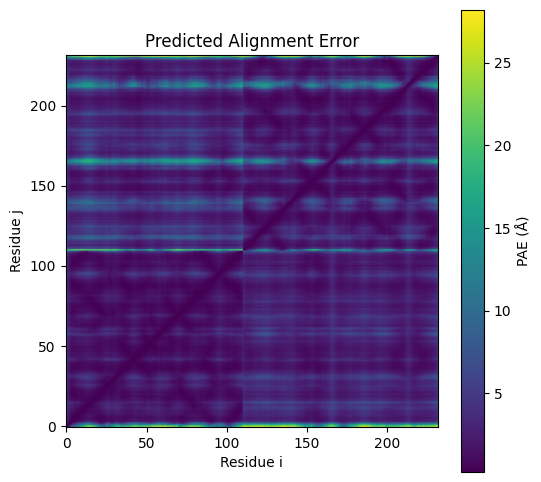

In [3]:
## TODO: change this!
protein_name = 'epoch0_sample1'

# plotting code
base_path = Path(f'output/boltz/boltz_results_yaml/predictions/{protein_name}')
structure_path = base_path / f'{protein_name}_model_0.cif' 
pae_path = base_path / f'pae_{protein_name}_model_0.npz'
plddt_path = base_path / f'plddt_{protein_name}_model_0.npz'

if structure_path.exists():
    show_structure(structure_path, plddt_path)
    plot_pae(pae_path)